In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel(r'C:\Users\adity\OneDrive\Documents\Machine Learning\Project\Datasets\Heartattack_prediction_data.xlsx')
df1

Sex  Age  Heart Rate  Glucose    BMI  Smoker  Ciggarates(Per Day)  \
0       1   39        80.0     77.0  26.97       0                  0.0   
1       0   46        95.0     76.0  28.73       0                  0.0   
2       1   48        75.0     70.0  25.34       1                 20.0   
3       0   61        65.0    103.0  28.58       1                 30.0   
4       0   46        85.0     85.0  23.10       1                 23.0   
...   ...  ...         ...      ...    ...     ...                  ...   
4307    0   53        76.0    215.0  21.51       0                  0.0   
4308    0   49        65.0     98.0  20.68       0                  0.0   
4309    0   65        90.0     87.0  30.47       0                  0.0   
4310    1   46        75.0     74.0  23.59       1                 20.0   
4311    0   63        95.0     75.0  22.15       1                 40.0   

      Hypertension  Systolic  BP  Diastolic BP  ON BP Medication  \
0                0         106.0          70.0               0.0   
1                0         121.0          81.0               0.0   
2                0         127.5          80.0               0.0   
3                1         150.0          95.0               0.0   
4                0         130.0          84.0               0.0   
...            ...           ...           ...               ...   
4307             1         206.0          92.0               1.0   
4308             0          96.0          63.0               0.0   
4309             1         179.5         114.0               0.0   
4310             0         119.0          77.5               0.0   
4311             0         116.0          69.0               0.0   

      Previous Stroke  Diabetic  RiskOfCHD  
0                   0         0          0  
1                   0         0          0  
2                   0         0          0  
3                   0         0          1  
4                   0         0          0  
...               ...       ...        ...  
4307                0         1          1  
4308                0         0          0  
4309                0         0          0  
4310                0         0          0  
4311                0         0          1  

[4312 rows x 14 columns]

In [ ]:
df1.shape  #dimansions of the dataset

(4312, 14)

In [ ]:
df1.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [ ]:
df1.columns  #columns in the dataset

Index(['Sex', 'Age', 'Heart Rate', 'Glucose', 'BMI', 'Smoker',
       'Ciggarates(Per Day)', 'Hypertension', 'Systolic  BP', 'Diastolic BP',
       'ON BP Medication', 'Previous Stroke', 'Diabetic', 'RiskOfCHD'],
      dtype='object')

In [ ]:
df1.isnull().sum()  #checking for null values in the dataset

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [ ]:
df1.duplicated().sum()  #checking for duplicate values in the dataset

np.int64(68)

In [29]:
df = df1.dropna()   #dropping null values
df.drop_duplicates(inplace=True) #dropping duplicate valuesx

In [ ]:
df.duplicated().sum() #checking for duplicate values again

np.int64(0)

In [ ]:
df.describe().T  #statistical description of the dataset

count        mean        std    min     25%     50%  \
Sex                  3949.0    0.436313   0.495990   0.00    0.00    0.00   
Age                  3949.0   49.549253   8.561709  32.00   42.00   49.00   
Heart Rate           3949.0   75.794125  12.017503  44.00   68.00   75.00   
Glucose              3949.0   82.040010  23.496781  40.00   72.00   78.00   
BMI                  3949.0   25.797371   4.067156  15.54   23.08   25.38   
Smoker               3949.0    0.489997   0.499963   0.00    0.00    0.00   
Ciggarates(Per Day)  3949.0    9.031907  11.962920   0.00    0.00    0.00   
Hypertension         3949.0    0.309952   0.462532   0.00    0.00    0.00   
Systolic  BP         3949.0  132.273614  21.939643  83.50  117.00  128.00   
Diastolic BP         3949.0   82.869840  11.881098  48.00   75.00   82.00   
ON BP Medication     3949.0    0.030134   0.170978   0.00    0.00    0.00   
Previous Stroke      3949.0    0.005571   0.074441   0.00    0.00    0.00   
Diabetic             3949.0    0.026589   0.160899   0.00    0.00    0.00   
RiskOfCHD            3949.0    0.151684   0.358760   0.00    0.00    0.00   

                        75%    max  
Sex                    1.00    1.0  
Age                   56.00   70.0  
Heart Rate            83.00  143.0  
Glucose               87.00  394.0  
BMI                   28.04   56.8  
Smoker                 1.00    1.0  
Ciggarates(Per Day)   20.00   70.0  
Hypertension           1.00    1.0  
Systolic  BP         143.50  295.0  
Diastolic BP          89.50  142.5  
ON BP Medication       0.00    1.0  
Previous Stroke        0.00    1.0  
Diabetic               0.00    1.0  
RiskOfCHD              0.00    1.0

In [ ]:
col1 = df.iloc[:, 1:8] 
col2 = df.iloc[:, 8:]

Age


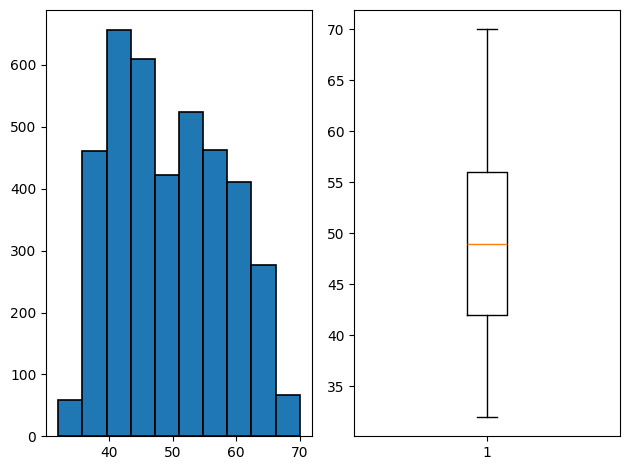

Heart Rate


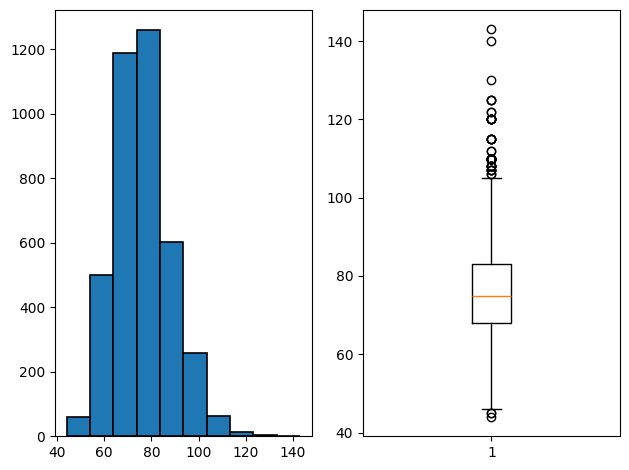

Glucose


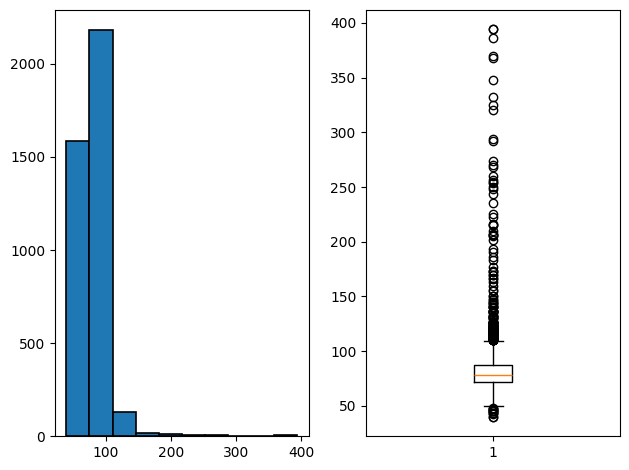

BMI


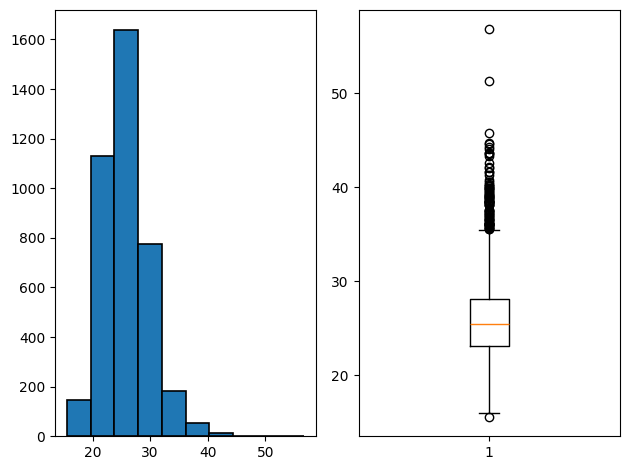

Smoker


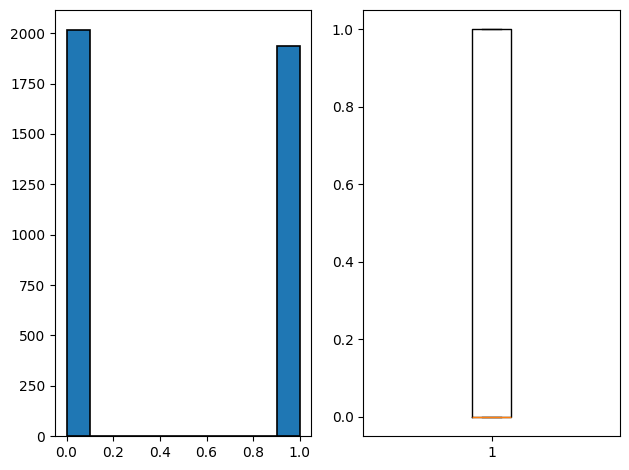

Ciggarates(Per Day)


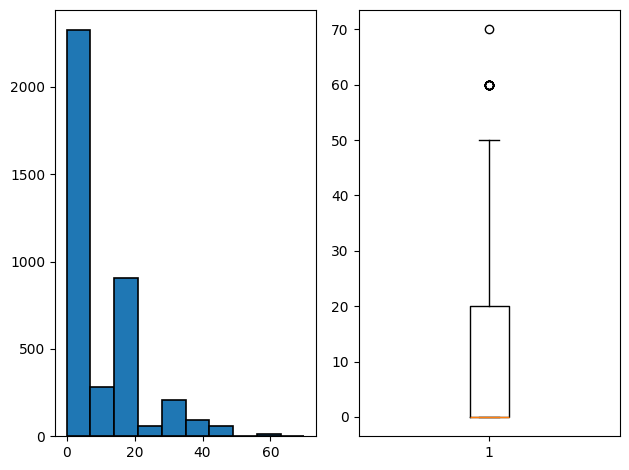

Hypertension


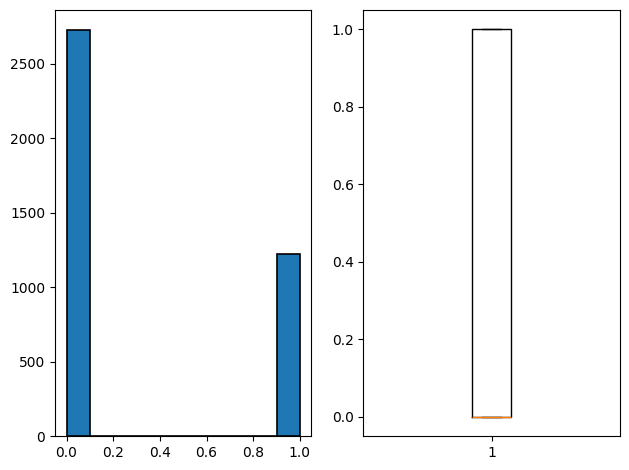

In [ ]:
for i in col1: 
    print(i) 
    
    plt.figure() 
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False, edgecolor='black',linewidth=1.2)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i])
    
    plt.tight_layout() 
    plt.show() 

Systolic  BP


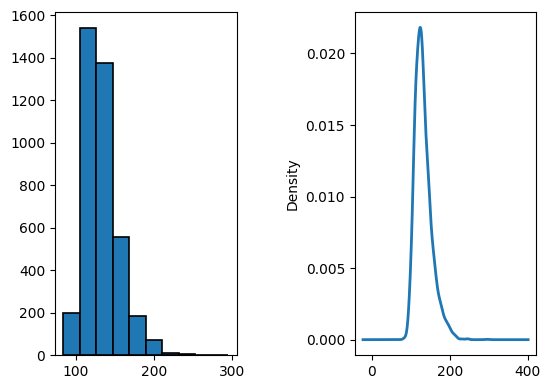

Diastolic BP


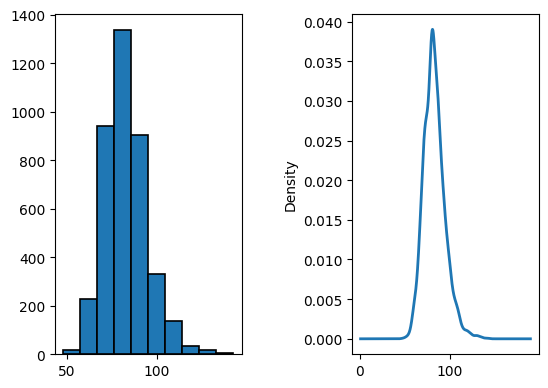

ON BP Medication


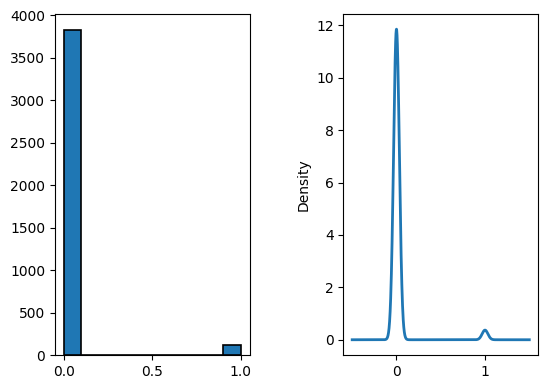

Previous Stroke


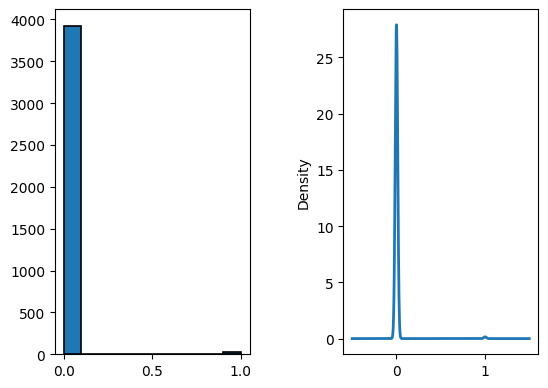

Diabetic


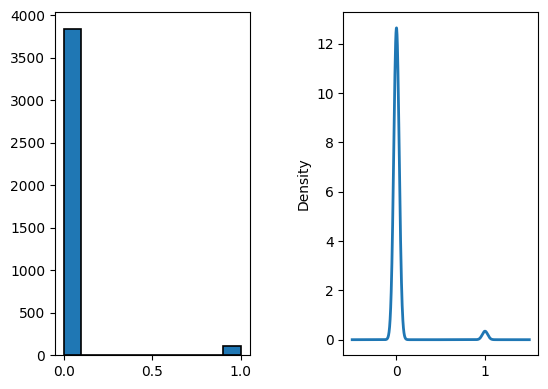

RiskOfCHD


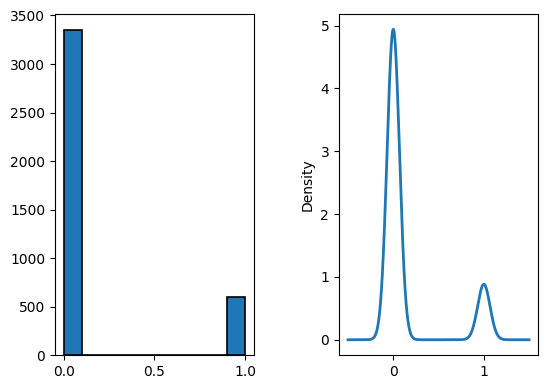

In [ ]:
for i in col2: 
    print(i)
    
    plt.figure()
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False, edgecolor='black',linewidth=1.2)
    
    plt.subplot(1, 2, 2)
    df[i].plot(kind='density',linewidth=2)
    
    plt.tight_layout(pad=4, w_pad=3, h_pad=3) 
    plt.show() 

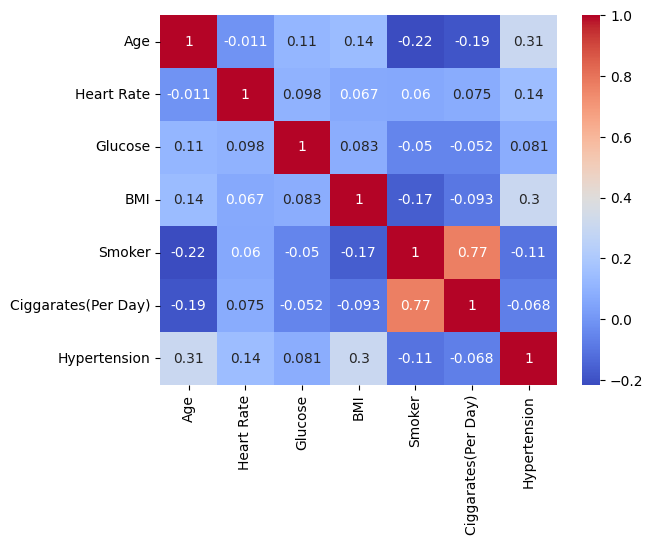

In [ ]:
import seaborn as sns #visualization library
corr = df.iloc[:, 1:8].corr(method='pearson') 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

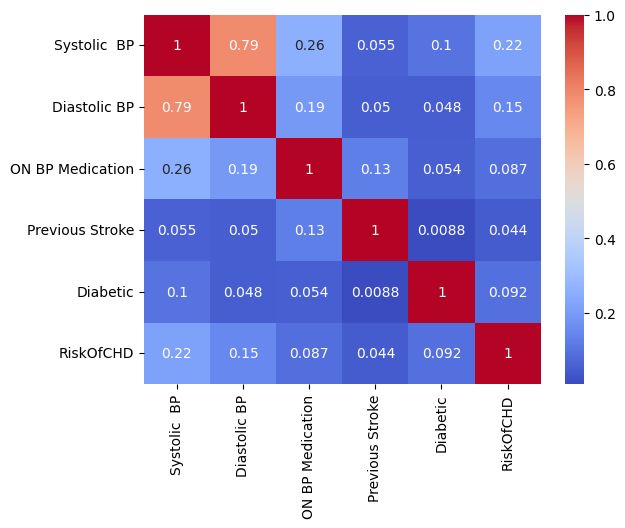

In [ ]:
corr = df.iloc[:, 8:].corr(method='pearson') 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
features = list(df.columns[:14]) #dataframe columns
features

['Sex',
 'Age',
 'Heart Rate',
 'Glucose',
 'BMI',
 'Smoker',
 'Ciggarates(Per Day)',
 'Hypertension',
 'Systolic  BP',
 'Diastolic BP',
 'ON BP Medication',
 'Previous Stroke',
 'Diabetic',
 'RiskOfCHD']

In [ ]:
features = df[['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']] #selecting features for the model
y = df['RiskOfCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42) #splitting the dataset into training and testing sets

In [ ]:
model = DecisionTreeClassifier(criterion='entropy') #creating a Decision Tree Classifier model
model.fit(X_train, y_train) #fitting the model with training data
model

DecisionTreeClassifier(criterion='entropy')

In [ ]:
features = list(df.columns[:14]) 

In [23]:
import math

#function to calaculate entropy
def entropy(col):
    counts = col.value_counts()
    probibility = counts/len(col)
    return -sum(probibility * probibility.apply(math.log2))

#function to calculate conditional entropy
def cond_entropy(data, feature, target):
    feature_values = data[features].value_counts()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += len(subset)/len(data) * entropy(subset[target])
    return weighted_entropy

#function to calculate information gain
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_cond_entropy = cond_entropy(data, feature, target)
    return total_entropy - feature_cond_entropy

#function to information gain of all features
for feature in features:
    ig = information_gain(df, feature, 'RiskOfCHD')
    print(f"Information Gain for {feature}:{ig}")

Information Gain for Sex:-1211.4239021188873
Information Gain for Age:0.6140384472794552
Information Gain for Heart Rate:0.6140384472794552
Information Gain for Glucose:0.6140384472794552
Information Gain for BMI:0.6140384472794552
Information Gain for Smoker:-1230.1187642798463
Information Gain for Ciggarates(Per Day):-31.259746290928376
Information Gain for Hypertension:-982.7669595913563
Information Gain for Systolic  BP:0.6140384472794552
Information Gain for Diastolic BP:0.6140384472794552
Information Gain for ON BP Medication:-107.98434125974285
Information Gain for Previous Stroke:-20.190488253934994
Information Gain for Diabetic:-97.68449317437333
Information Gain for RiskOfCHD:0.6140384472794552


In [ ]:
dot_data = export_graphviz(model, out_file= None, feature_names=X_train.columns, precision=2, filled=True, rounded=True) 

#convert DOT data to grapth
graph = pydotplus.graph_from_dot_data(dot_data)

#display the graph
Image(graph.create_png())

In [ ]:
y_test #predicting the target variable using the model

3393    0
2338    0
1977    0
71      0
2844    0
       ..
2298    1
1912    0
784     1
3544    0
1969    0
Name: RiskOfCHD, Length: 790, dtype: int64

In [ ]:
y_pred = model.predict(X_test) 
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
accuracy = accuracy_score(y_test, y_pred) #calculating the accuracy of the model
classification_rep = classification_report(y_test, y_pred) #calculating the classification report
conf_matrix = confusion_matrix(y_test, y_pred) #calculating the confusion matrix

#print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7708860759493671
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       677
           1       0.23      0.25      0.24       113

    accuracy                           0.77       790
   macro avg       0.55      0.55      0.55       790
weighted avg       0.78      0.77      0.78       790

Confusion Matrix:
 [[581  96]
 [ 85  28]]


In [ ]:
# [['Sex','Age','Smoker','Hypertension','Systolic  BP','Diastolic BP']]
new_data = [[1, 45, 1, 1, 120, 80]]
y_pred = model.predict(new_data)
print(y_pred[0]) # Predicting the risk of CHD for a new patient


0
